In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../src')

%matplotlib inline
sns.set()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
train = pd.read_csv('../data/aug_train.csv')


display(train.head())
train.info()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


## **1. Actions Required**

#### **Drop**
- id

#### **Binarize**
- Gender
- Vehicle_Damage

#### **Discretize**
- Vehicle_age

#### **Drop**
- id

In [3]:
train['Vehicle_Age'].unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [ ]:
import json

preprocessing_steps = {
    'drop': {
        'columns': ['id'],
        'transformer': 'ColumnDropper'
    },
    'binarize': {
        'columns': ['Gender', 'Vehicle_Damage'],
        'transformer': 'ClassReplaceTransformer', 
        'args': [{'Male': 0, 'Female': 1}, {'No': 0, 'Yes': 1}]

    },
    'discretize': {
        'columns': ['Vehicle_Age'],
        'transformer': 'ClassReplaceTransformer',
        'args': {0: '< 1 Year', 1: '1-2 Year', 2: '> 2 Years'}
    }
}

with open('../src/preprocessing_steps.json', 'w') as f:
    json.dump(preprocessing_steps, f)
    



In [5]:
from sklearn.preprocessing import FunctionTransformer

import transformers as tsf




specific_preprocessor  = tsf.ColumnTransformer(
    transformers=[
        ('drop', FunctionTransformer(drop_columns, kw_args={'cols':['id', 'Signature_Date']}), columns_to_drop),
        ('vehicleAge', tsf.ClassReplaceTransformer(), ['Vehicle_Date']),
        ('policySalesBinarizer', tsf.ClassReplaceTransformer(mapping=mappings['policy_sales_channel_mapping']), ['Policy_Sales_Channel']),
        ('regionCodeImportanceDiscretizer', tsf.ClassReplaceTransformer(mapping=mappings['region_code_mapping']), ['Region_Code']),
        ('generalTreatmentColsPassthru', 'passthrough', standard_treatment_columns)
        ]
)


NameError: name 'drop_columns' is not defined

## **2. Exploration**

Index(['Driving_License', 'Previously_Insured', 'Response', 'Gender'], dtype='object')


<Axes: ylabel='count'>

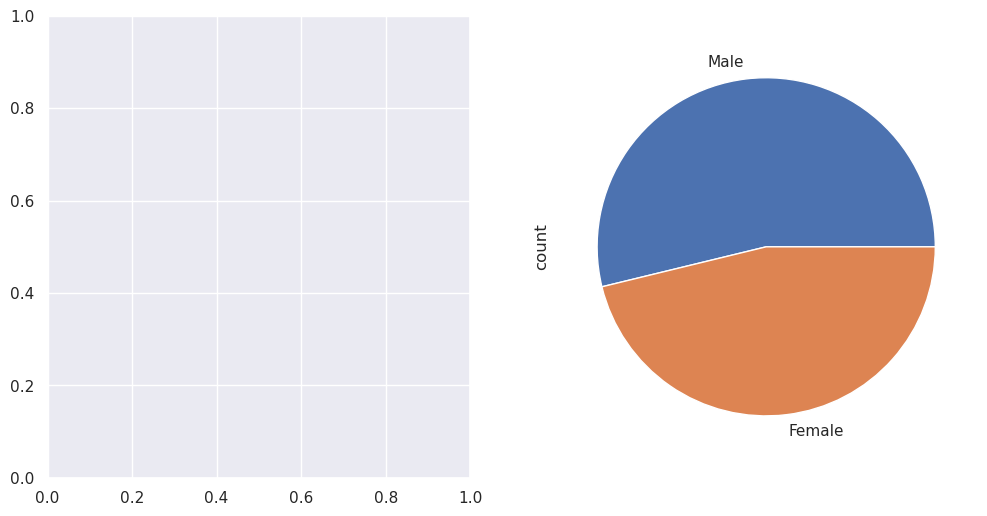

In [ ]:

import viz

# Binary Variables
binary_vars = train.select_dtypes(include=bool).columns\
    .append(train.loc[:, train.max() == 1].columns)\
    .append(train[['Gender']].columns)
  
   
viz.plot_binary_pies(train, binary_vars)
    
print(binary_vars)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
train['Gender'].value_counts().plot(kind='pie')